In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory data analysis
Here we start exploring the data to find out how we should proceed. Thus we visualize the data and we look for missing as well as inconsistent entries. We obviously start by uploading our two main tables.

In [2]:
application_train = pd.read_csv("application_train.csv")
application_test = pd.read_csv("application_test.csv")

In [3]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Let's start looking for missing entries and thus choosing how to treat them based on their distribution.

In [4]:
train_null = application_train.isnull()
test_null = application_test.isnull()

print("There's a total of " + str(train_null.sum().sum()) + " missing entries on the application train table.")
print("There's a total of " + str(test_null.sum().sum()) + " missing entries on the application test table.")

del(train_null)
del(test_null)

There's a total of 9152465 missing entries on the application train table.
There's a total of 1404419 missing entries on the application test table.


Since there are a lot of missing values both in the train table as well as in the test table we can't just get rid of rows with NA entries. Instead we must find a way to deal with them (maybe using imputation). We'll come back to it later. For now let's keep going with exploratory data analysis.

We now want to check the types of our features.

In [5]:
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

We see that there are $65$ continous features, $41$ integers features (remember that two of them are, respectively, the ID of the loan and the target outcome) and $16$ categorical features. Let's start by getting some informations on our continous features.

We start noting that a lot of features refer to informations about building where the clients live. Since there are $42$ of them and we would like to reduce the dimensionality of the problem (in sight of better performance and predictive power later on), let's take a look at those featuresm and see if we can get rid of some of them.

In [6]:
building_features = application_train.columns[44 : 86]
building_features

Index(['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI'],
      dtype='object')

In [7]:
build_features_data = application_train[building_features]

In [8]:
build_features_data

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI
0,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,...,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000
1,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,...,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,...,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118
307507,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,...,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000
307508,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,...,0.0124,0.00,0.2069,0.1667,0.2083,NaN,0.0855,0.9445,0.0000,0.0000
307509,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,...,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0062,NaN,NaN


The first thing we note is that for every building information we have three values: mean, mode and median. We are interested in seeing if these values are highly correlated (as we suspect).

In [9]:
build_data_correlation = build_features_data.corr()

pd.Series(np.diag(build_data_correlation.iloc[range(0, 13), range(14, 27)]), index = [build_data_correlation.index[:13], build_data_correlation.columns[14:27]])

APARTMENTS_AVG               APARTMENTS_MODE                 0.973259
BASEMENTAREA_AVG             BASEMENTAREA_MODE               0.973496
YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MODE    0.971893
YEARS_BUILD_AVG              YEARS_BUILD_MODE                0.989444
COMMONAREA_AVG               COMMONAREA_MODE                 0.977147
ELEVATORS_AVG                ELEVATORS_MODE                  0.978837
ENTRANCES_AVG                ENTRANCES_MODE                  0.977743
FLOORSMAX_AVG                FLOORSMAX_MODE                  0.985689
FLOORSMIN_AVG                FLOORSMIN_MODE                  0.985875
LANDAREA_AVG                 LANDAREA_MODE                   0.973696
LIVINGAPARTMENTS_AVG         LIVINGAPARTMENTS_MODE           0.970117
LIVINGAREA_AVG               LIVINGAREA_MODE                 0.972050
NONLIVINGAPARTMENTS_AVG      NONLIVINGAPARTMENTS_MODE        0.969370
dtype: float64

In [10]:
pd.Series(np.diag(build_data_correlation.iloc[range(0, 13), range(28, 41)]), index = [build_data_correlation.index[:13], build_data_correlation.columns[28:41]])

APARTMENTS_AVG               APARTMENTS_MEDI                 0.995081
BASEMENTAREA_AVG             BASEMENTAREA_MEDI               0.994317
YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI    0.993825
YEARS_BUILD_AVG              YEARS_BUILD_MEDI                0.998495
COMMONAREA_AVG               COMMONAREA_MEDI                 0.995978
ELEVATORS_AVG                ELEVATORS_MEDI                  0.996099
ENTRANCES_AVG                ENTRANCES_MEDI                  0.996886
FLOORSMAX_AVG                FLOORSMAX_MEDI                  0.997034
FLOORSMIN_AVG                FLOORSMIN_MEDI                  0.997241
LANDAREA_AVG                 LANDAREA_MEDI                   0.991610
LIVINGAPARTMENTS_AVG         LIVINGAPARTMENTS_MEDI           0.993825
LIVINGAREA_AVG               LIVINGAREA_MEDI                 0.995596
NONLIVINGAPARTMENTS_AVG      NONLIVINGAPARTMENTS_MEDI        0.990768
dtype: float64

We actually see a lot of correlation, for every building information, between mean, mode and median. This suggests us we can actually use just one of them and get rid of the others.

Thus we're going to restrict our building informatin features to just the means.

In [11]:
building_features = build_features_data.columns[:13]
building_features

Index(['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG'],
      dtype='object')

In [12]:
build_features_data = build_features_data[building_features]

In [14]:
build_features_data

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG
0,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000
1,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753
307507,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000
307508,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000
307509,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0061,NaN


We now look if there are other high correlations between these "new" features.

(13.5, -0.5)

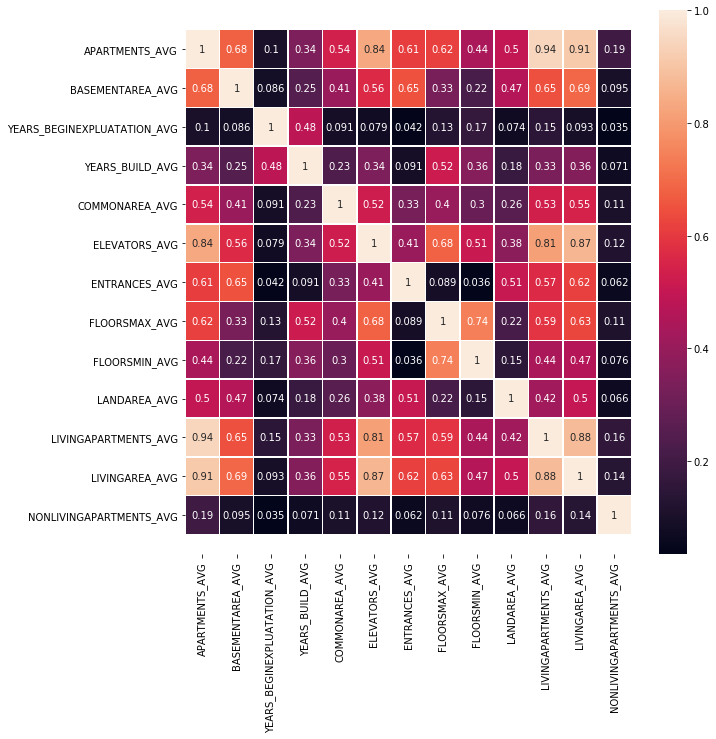

In [23]:
plt.figure(figsize = (10, 10))
ax = sns.heatmap(build_features_data.corr(), annot = True, linewidths = 0.5)
ax.set_ylim(len(build_features_data.corr().columns) + 0.5, -0.5)

We get a bunch of information: first of all features APARTMENTS_AVG, ELEVATORS_AVG, LIVINGAPARTMENTS_AVG and LIVINGAREA_AVG are all correlated and we should just keep one of them.

The same can be said for FLOORSMAX_AVG and FLOORSMIN_AVG.

To choose which of the said features we want to mantain, we're going to look at the standard deviation as well as at the missing values and save the ones with a nice tradeoff of high variance and poor missing entries.

In [27]:
build_features_data.std()

APARTMENTS_AVG                 0.108240
BASEMENTAREA_AVG               0.082438
YEARS_BEGINEXPLUATATION_AVG    0.059223
YEARS_BUILD_AVG                0.113280
COMMONAREA_AVG                 0.076036
ELEVATORS_AVG                  0.134576
ENTRANCES_AVG                  0.100049
FLOORSMAX_AVG                  0.144641
FLOORSMIN_AVG                  0.161380
LANDAREA_AVG                   0.081184
LIVINGAPARTMENTS_AVG           0.092576
LIVINGAREA_AVG                 0.110565
NONLIVINGAPARTMENTS_AVG        0.047732
dtype: float64

In [28]:
build_features_data.isnull().sum()

APARTMENTS_AVG                 156061
BASEMENTAREA_AVG               179943
YEARS_BEGINEXPLUATATION_AVG    150007
YEARS_BUILD_AVG                204488
COMMONAREA_AVG                 214865
ELEVATORS_AVG                  163891
ENTRANCES_AVG                  154828
FLOORSMAX_AVG                  153020
FLOORSMIN_AVG                  208642
LANDAREA_AVG                   182590
LIVINGAPARTMENTS_AVG           210199
LIVINGAREA_AVG                 154350
NONLIVINGAPARTMENTS_AVG        213514
dtype: int64

We thus choose to keep LIVINGAREA_AVG and FLOORSMAX_AVG.

In [29]:
building_features = np.delete(building_features, [0, 5, 8, 10])
building_features

Index(['BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG'],
      dtype='object')

In [30]:
build_features_data = build_features_data[building_features]

In [32]:
build_features_data

,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG
0,0.0369,0.9722,0.6192,0.0143,0.0690,0.0833,0.0369,0.0190,0.0000
1,0.0529,0.9851,0.7960,0.0605,0.0345,0.2917,0.0130,0.0549,0.0039
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
307506,0.0887,0.9876,0.8300,0.0202,0.1034,0.6042,0.0594,0.1965,0.0753
307507,0.0435,0.9727,0.6260,0.0022,0.1034,0.0833,0.0579,0.0257,0.0000
307508,0.0862,0.9816,0.7484,0.0123,0.2069,0.1667,NaN,0.9279,0.0000
307509,NaN,0.9771,NaN,NaN,0.0690,0.0417,NaN,0.0061,NaN


We now want to treat missing values. Before choosing how to impute them it's better to check if there's a correlation between missing entries and target value.

In [118]:
def check_missing_value_distributions(dataframe, columns, target_vector):
    observations = len(target_vector)
    sns.set()
    for feature in columns:
        target_not_missing = 0
        target_missing = 0
        for row in dataframe.iterrows():
            if(np.isnan(row[1][feature])):
                target_missing = target_missing + target_vector[row[0]]
            else:
                target_not_missing = target_not_missing + target_vector[row[0]]
        f, axes = plt.subplots(1, 2, figsize = (20, 7))
        f.suptitle(feature)
        axes[0].set_title("Not missing values")
        axes[1].set_title("Missing values")
        sns.barplot(x = [0, 1], y = [(observations - target_not_missing) * (100 / observations), target_not_missing * (100 / observations)], ax = axes[0])
        sns.barplot(x = [0, 1], y = [(observations - target_missing) * (100 / observations), target_missing * (100 / observations)], ax = axes[1])

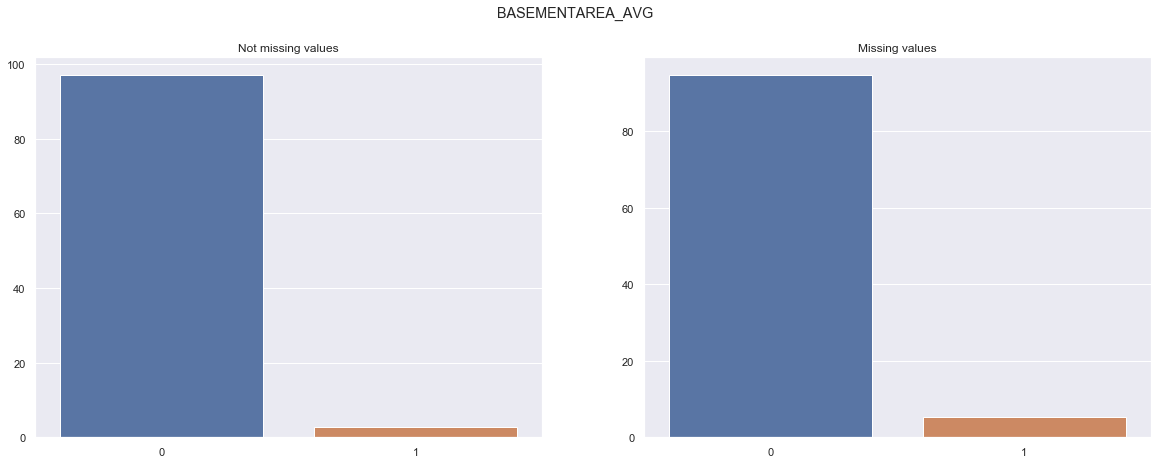

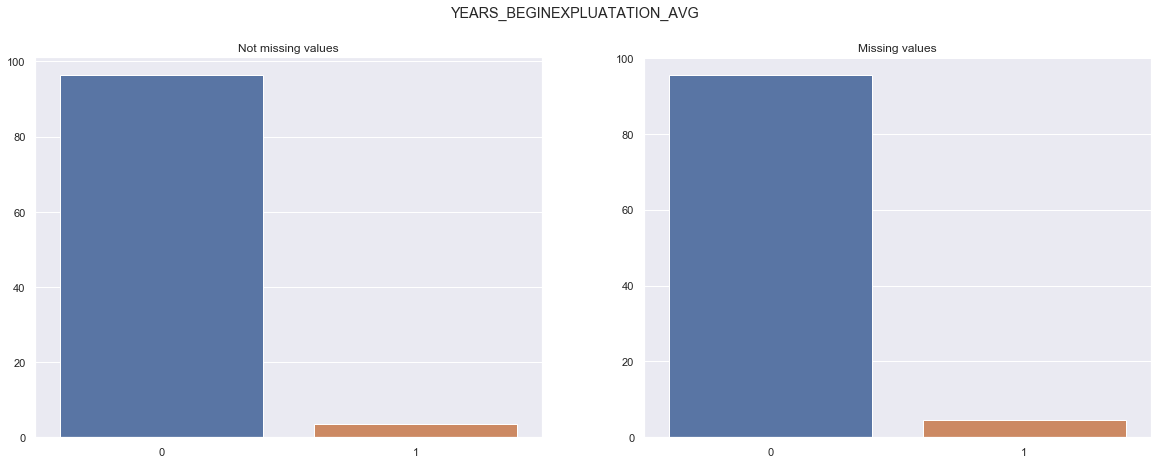

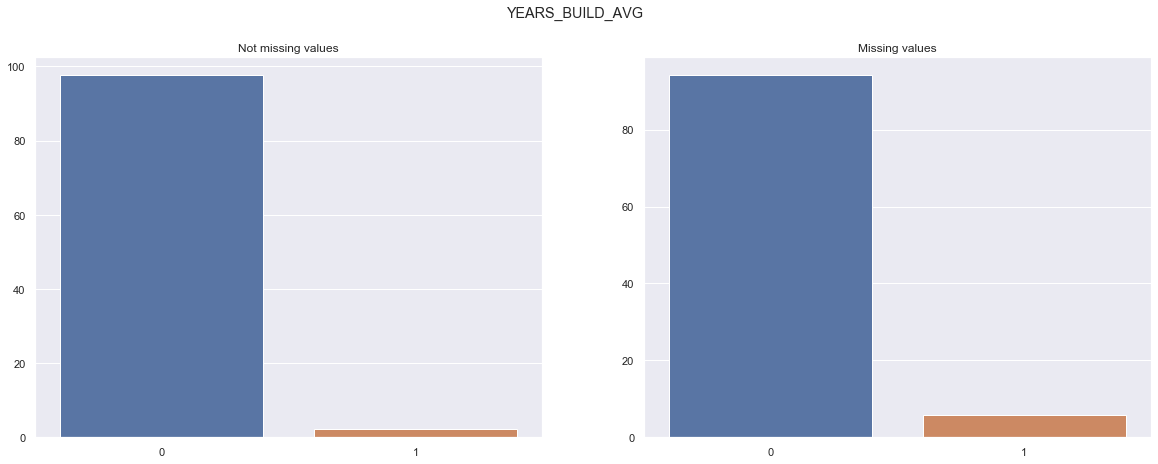

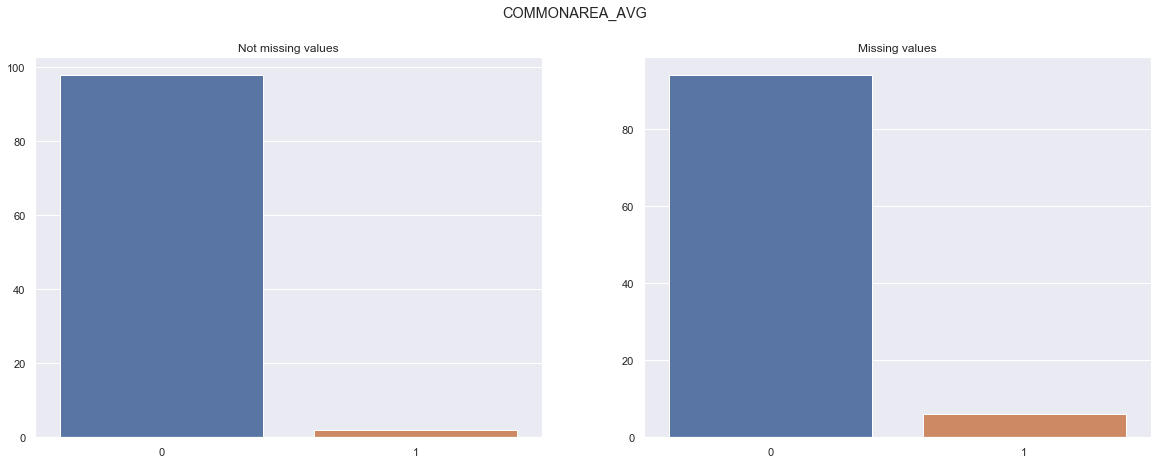

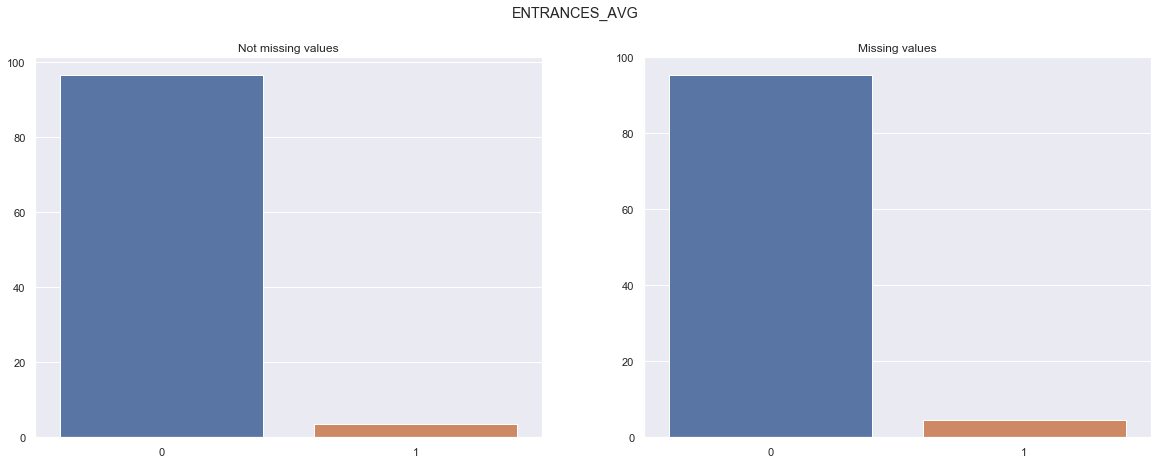

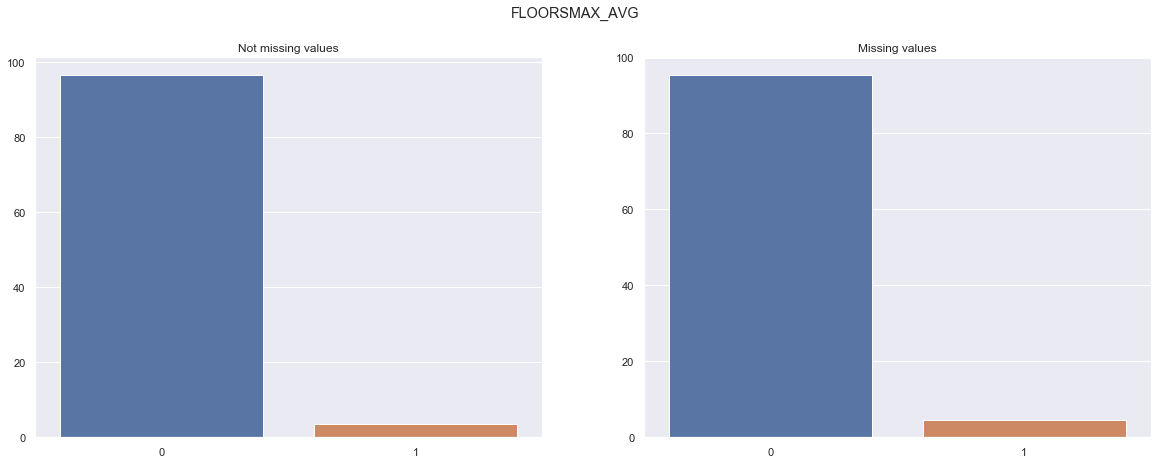

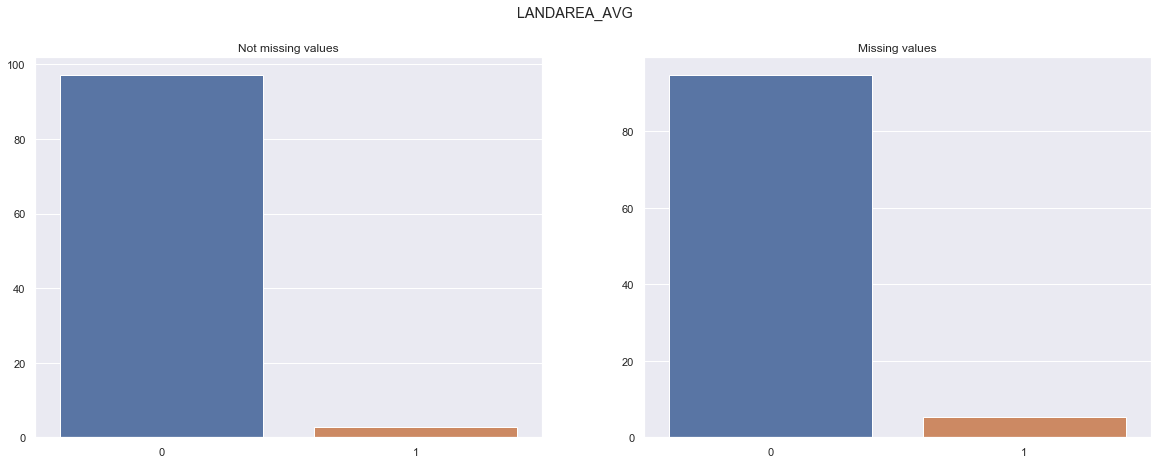

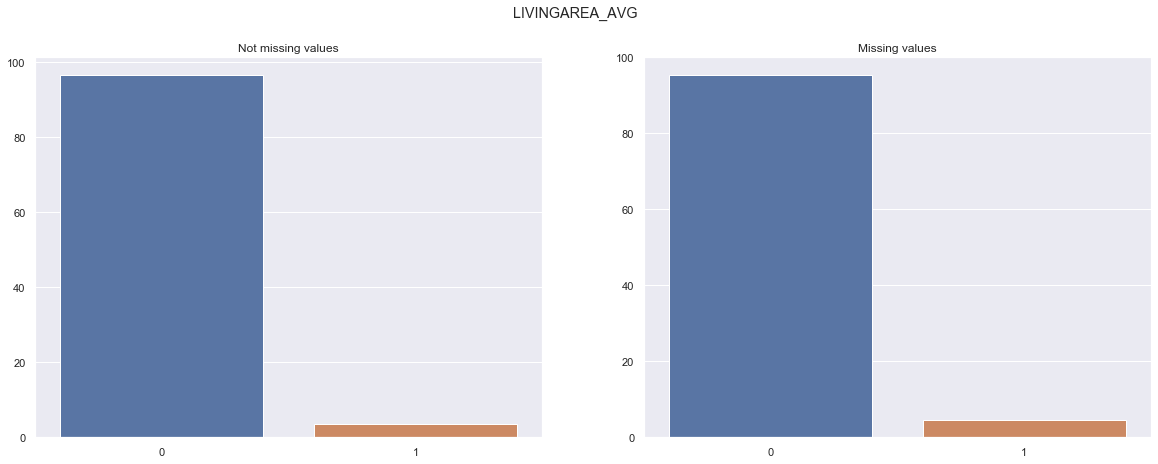

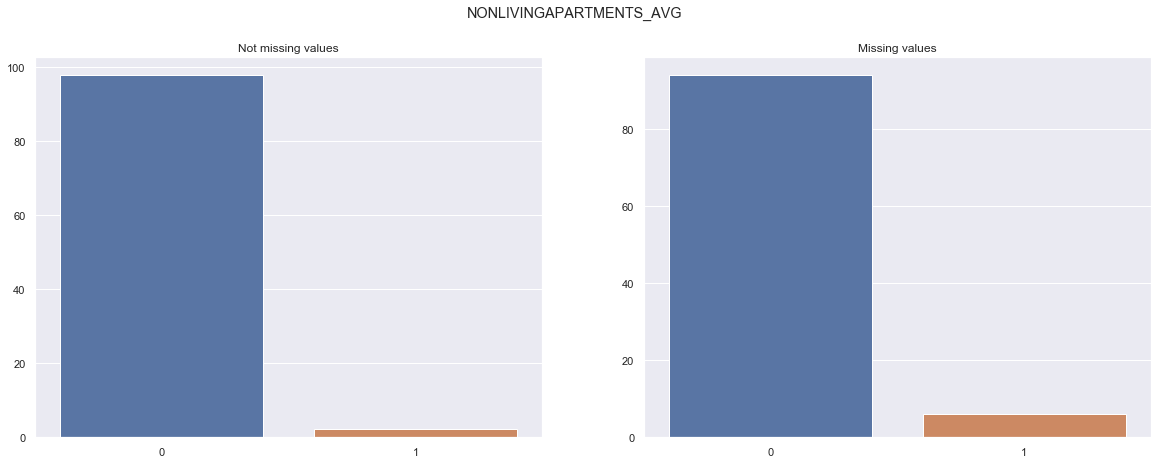

In [119]:
check_missing_value_distributions(build_features_data, build_features_data, application_train['TARGET'])

[]

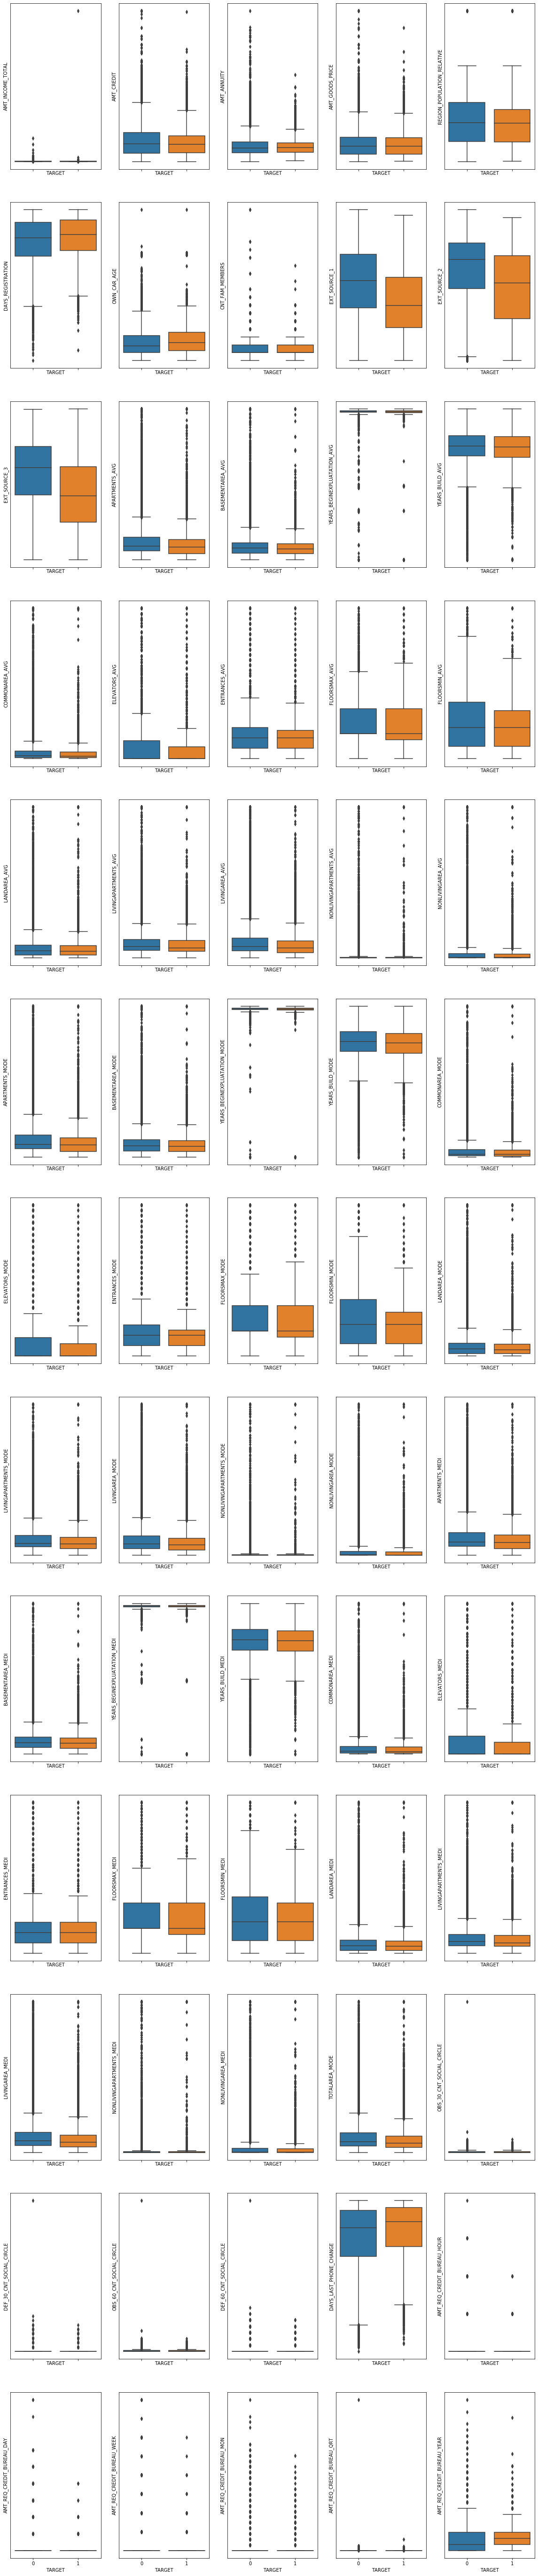

In [17]:
features = application_train.select_dtypes('float64').columns

_, axes = plt.subplots(13, 5, figsize = (20, 100), sharex = True)

for index in range(0, len(features), 5):
    for sub_index in range(5):
        sns.boxplot(x = 'TARGET', y = features[index + sub_index], data = application_train, ax = axes[index // 5, sub_index])
        
plt.setp(axes, yticks = [])

In [8]:
float_data

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,NaN,1.0,0.083037,0.262949,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0.311267,0.622246,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,NaN,0.555912,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,NaN,2.0,NaN,0.650442,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,NaN,1.0,NaN,0.322738,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,NaN,1.0,0.145570,0.681632,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,NaN,1.0,NaN,0.115992,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,NaN,1.0,0.744026,0.535722,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,NaN,2.0,NaN,0.514163,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
building_data = application_train.iloc[:, range(44, 86)]
building_data_correlation = building_data.corr()

In [33]:
building_data

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI
0,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,...,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000
1,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,...,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,...,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118
307507,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,...,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000
307508,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,...,0.0124,0.00,0.2069,0.1667,0.2083,NaN,0.0855,0.9445,0.0000,0.0000
307509,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,...,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0062,NaN,NaN


In [46]:
pd.Series(np.diag(building_data_correlation.iloc[range(0, 13), range(14, 27)]), index = [building_data_correlation.index[:13], building_data_correlation.columns[14:27]])

APARTMENTS_AVG               APARTMENTS_MODE                 0.973259
BASEMENTAREA_AVG             BASEMENTAREA_MODE               0.973496
YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MODE    0.971893
YEARS_BUILD_AVG              YEARS_BUILD_MODE                0.989444
COMMONAREA_AVG               COMMONAREA_MODE                 0.977147
ELEVATORS_AVG                ELEVATORS_MODE                  0.978837
ENTRANCES_AVG                ENTRANCES_MODE                  0.977743
FLOORSMAX_AVG                FLOORSMAX_MODE                  0.985689
FLOORSMIN_AVG                FLOORSMIN_MODE                  0.985875
LANDAREA_AVG                 LANDAREA_MODE                   0.973696
LIVINGAPARTMENTS_AVG         LIVINGAPARTMENTS_MODE           0.970117
LIVINGAREA_AVG               LIVINGAREA_MODE                 0.972050
NONLIVINGAPARTMENTS_AVG      NONLIVINGAPARTMENTS_MODE        0.969370
dtype: float64

In [48]:
pd.Series(np.diag(building_data_correlation.iloc[range(0, 13), range(28, 41)]), index = [building_data_correlation.index[:13], building_data_correlation.columns[28:41]])

APARTMENTS_AVG               APARTMENTS_MEDI                 0.995081
BASEMENTAREA_AVG             BASEMENTAREA_MEDI               0.994317
YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI    0.993825
YEARS_BUILD_AVG              YEARS_BUILD_MEDI                0.998495
COMMONAREA_AVG               COMMONAREA_MEDI                 0.995978
ELEVATORS_AVG                ELEVATORS_MEDI                  0.996099
ENTRANCES_AVG                ENTRANCES_MEDI                  0.996886
FLOORSMAX_AVG                FLOORSMAX_MEDI                  0.997034
FLOORSMIN_AVG                FLOORSMIN_MEDI                  0.997241
LANDAREA_AVG                 LANDAREA_MEDI                   0.991610
LIVINGAPARTMENTS_AVG         LIVINGAPARTMENTS_MEDI           0.993825
LIVINGAREA_AVG               LIVINGAREA_MEDI                 0.995596
NONLIVINGAPARTMENTS_AVG      NONLIVINGAPARTMENTS_MEDI        0.990768
dtype: float64

In [49]:
reduced_build_data = building_data.iloc[:, 0:13]

In [58]:
reduced_build_data

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG
0,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000
1,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753
307507,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000
307508,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000
307509,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0061,NaN
